# MLS Toyblocks Demo 

Notebook creator: Hannah Weiser & Sina Zumstein, 2023

This demo scene uses 3D models of toyblocks, which will be scanned by ground-based mobile laser scanning (MLS). We will use the command-line access of HELIOS++ to run the simulation, and use Python just for displaying the input XMLs and the resulting point cloud.

In [1]:
from pathlib import Path
from IPython.display import Code
from pyhelios.util.xmldisplayer import display_xml, find_playback_dir

In [2]:
import os
os.chdir("..")

## Survey
Lets's have a look at the XML files in the simulation. First, we investigate the **survey** XML file, `mls_toyblocks.xml`:

In [3]:
Code(display_xml('data/surveys/toyblocks/mls_toyblocks.xml'), language='XML')

<document>
	<survey name="toyblocks_mls" platform="data/platforms.xml#vmq-1ha-car-0" scanner="data/scanners_als.xml#riegl_vux-1ha22" scene="data/scenes/toyblocks/toyblocks_scene.xml#toyblocks_scene">
	<!-- platform: car, deflector: rotating -->
	
		<leg>
			<platformSettings x="-30" y="65.0" z="0.000" onGround="true" movePerSec_m="20" />
			<scannerSettings active="true" pulseFreq_hz="100000" scanAngle_deg="180" scanFreq_hz="50" headRotatePerSec_deg="0.00" headRotateStart_deg="0.00" headRotateStop_deg="0.00" trajectoryTimeInterval_s="0.05" />
		</leg>
		<leg>
			<platformSettings x="-25.0" y="-30.0" z="0.000" onGround="true" movePerSec_m="20" />
			<scannerSettings active="true" pulseFreq_hz="100000" scanAngle_deg="180" scanFreq_hz="50" headRotatePerSec_deg="0.00" headRotateStart_deg="0.00" headRotateStop_deg="0.00" trajectoryTimeInterval_s="0.05" />
		</leg>
				<leg>
			<platformSettings x="1.0" y="-30.0" z="0.000" onGround="true" movePerSec_m="20" />
			<scannerSettings active="true" pulseFreq_hz="100000" scanAngle_deg="180" scanFreq_hz="50" headRotatePerSec_deg="0.00" headRotateStart_deg="0.00" headRotateStop_deg="0.00" trajectoryTimeInterval_s="0.05" />
		</leg>
		<leg>
			<platformSettings x="31.0" y="0.0" z="0.0" onGround="true" movePerSec_m="20" />
			<scannerSettings active="true" pulseFreq_hz="100000" scanAngle_deg="180" scanFreq_hz="50" headRotatePerSec_deg="0.00" headRotateStart_deg="0.00" headRotateStop_deg="0.00" trajectoryTimeInterval_s="0.05" />
		</leg>
		<leg>
			<platformSettings x="73.5" y="0.0" z="0.0" onGround="true" movePerSec_m="20" />
			<scannerSettings active="true" pulseFreq_hz="100000" scanAngle_deg="180" scanFreq_hz="50" headRotatePerSec_deg="0.00" headRotateStart_deg="0.00" headRotateStop_deg="0.00" />
		</leg>
	</survey>
</document>

We can see, that there are five `leg`elements, that define the waypoints of the vehicle around the object to be scanned. Here only `x` and `y` values are important. Because the `onGround` is set to "true", the platform is automatically placed on the ground object. In total there are four lines the vehicle will drive along. The `movePerSec_m` parameter indicates the speed between these waypoints. Next, let's have a look at the scanner and the platform. 

# Scanner 
The scanner is a `riegl_vux-1ha22` defined in data/scanners_als.xml as shown in the survey XML.

In [4]:
Code(display_xml('data/scanners_als.xml','riegl_vux-1ha22'))

<scanner id="riegl_vux-1ha22" accuracy_m="0.005" beamDivergence_rad="0.0005" name="RIEGL VUX-1HA22" optics="rotating" pulseFreqs_Hz="300000,500000,1000000,1250000,1500000,1800000" pulseLength_ns="4" rangeMin_m="1" scanAngleMax_deg="180" scanAngleEffectiveMax_deg="180" scanFreqMin_Hz="10" scanFreqMax_Hz="250">

			<beamOrigin x="0" y="0.015" z="0.0">
				<rot axis="x" angle_deg="90" />
				<rot axis="z" angle_deg="90" />
			</beamOrigin>
		<headRotateAxis x="0" y="0" z="1" />
	</scanner>

Here we can see the scanner-specific settings, for example `beamDivergence_rad`, the `accuracy` or the possible pulse frequencies (`pulseFreqs_Hz`). This scanner has an rotating beam deflector (`optics`). The `beamOrigin` with two 90° rotations around both the x-axis and the y-axis results in the scanner pointing upwards and scanning left-to-right.

## Platform

In [5]:
Code(display_xml('data/platforms.xml', 'vmq-1ha-car-0'))

<platform id="vmq-1ha-car-0" name="RIEGL VMQ-1HA Car (0° mounting)" type="linearpath">
		<scannerMount x="0.0" y="-1.15" z="2.2">
			<rot axis="x" angle_deg="45" />
			<rot axis="z" angle_deg="0" />		
		</scannerMount>
	</platform>

This car platform is - for simplification - modelled as type "linearpath". The `scannerMount` with a 45° rotation around the x-axis in combination with the `beamOrigin` of the scanner results in the scanner looking back and up (45° from the horizontal). Furthermore, the scanner is mounted on the roof of the car in 2.2 m height and in the back of the car (-1.15 m from the platform center location.)

# Scene
Now we will have a look at the scene, `toyblocks_scene` in `data/scenes/toyblocks/toyblocks_scene.xml`:

In [6]:
Code(display_xml('data/scenes/toyblocks/toyblocks_scene.xml', 'toyblocks_scene'))

<scene id="toyblocks_scene" name="ToyblocksScene">
        <part>
            <filter type="objloader">
                <param type="string" key="filepath" value="data/sceneparts/basic/groundplane/groundplane.obj" />
            </filter>
            <filter type="scale">
                <param type="double" key="scale" value="70" />
            </filter>
			<filter type="translate">
				<param type="vec3" key="offset" value="20.0;0;0" />
			</filter>
        </part>
        <part>
            <filter type="objloader">
                <param type="string" key="filepath" value="data/sceneparts/toyblocks/cube.obj" />
            </filter>
			<filter type="scale">
                <param type="double" key="scale" value="1" />
            </filter>
        </part>
		<part>
            <filter type="objloader">
                <param type="string" key="filepath" value="data/sceneparts/toyblocks/cube.obj" />
            </filter>
			<filter type="rotate">
				<param key="rotation" type="rotation">
					<rot angle_deg="45" axis="z" />
				</param>
			</filter>
			<filter type="scale">
                <param type="double" key="scale" value="0.5" />
            </filter>
			<filter type="translate">
				<param type="integer" key="onGround" value="-1" />
				<param type="vec3" key="offset" value="-45.0;10.0;10" />
			</filter>
        </part>
        <part>
            <filter type="objloader">
                <param type="string" key="filepath" value="data/sceneparts/toyblocks/sphere.obj" />
            </filter>
			<filter type="scale">
                <param type="double" key="scale" value="0.5" />
            </filter>
        </part>
         <part>
            <filter type="objloader">
                <param type="string" key="filepath" value="data/sceneparts/toyblocks/cylinder.obj" />
            </filter>
			<filter type="scale">
                <param type="double" key="scale" value="1" />
            </filter>
        </part>
    </scene>

Here we see different objects, which compose the scene: the `groundplane.obj`, twice the `cube.obj`, the `sphere.obj` and the the `cylinder.obj`. To load them, the `objloader` filter is being used.

Different [transformation filters](https://github.com/3dgeo-heidelberg/helios/wiki/Scene#coordinate-transformations) (translation, rotation, scale) are applied to the objects:

- The `groundplane` is scaled by a factor of 70 and translated 20 units in the positive x-direction.
- The second `cube` is rotated by 45 degrees around the z-axis, scaled down by a factor of 0.5 and translated by the vector
$
 \vec{v}= \left(\begin{array}{c} -45 \\ 10 \\ 10 \end{array}\right)
$. On top of this transformation, this `cube` is translated vertically (in z-direction), so that it sits directly on the ground using the `onGround` parameter.
- The `sphere` is also scaled to half of its size.



# Executing the Simulation 
Next, we will run the simulation. In Jupyter Notebooks, we can run external commands with the !command syntax, but you can also just run it from the command line.

In [7]:
!helios data/surveys/toyblocks/mls_toyblocks.xml -q

HELIOS++ VERSION 0.1.dev1003+g06ef94c.d20240213

CWD: "/home/dkempf/helios"
seed: AUTO
surveyPath: "data/surveys/toyblocks/mls_toyblocks.xml"
assetsPath: "assets/"
outputPath: "output/"
writeWaveform: 0
writePulse: 0
calcEchowidth: 0
fullWaveNoise: 0
splitByChannel: 0
parallelization: 1
njobs: 0
chunkSize: 32
warehouseFactor: 4
platformNoiseDisabled: 0
legNoiseDisabled: 0
rebuildScene: 0
lasOutput: 0
las10: 0
fixedIncidenceAngle: 0
gpsStartTime: 
kdtType: 4
kdtJobs: 0
kdtGeomJobs: 0
sahLossNodes: 32

xmlDocFilename: mls_toyblocks.xml
xmlDocFilePath: data/surveys/toyblocks
xmlDocFilename: scanners_als.xml
xmlDocFilePath: data
Using default value for attribute 'averagePower_w' : 4
Using default value for attribute 'beamQualityFactor' : 1
Using default value for attribute 'opticalEfficiency' : 0.99
Using default value for attribute 'receiverDiameter_m' : 0.15
Using default value for attribute 'atmosphericVisibility_km' : 23
Using default value for attribute 'wavelength_nm' : 1064
Scanner:

## The results
Now we can display a 3D plot

In [8]:
import numpy as np
import matplotlib.pyplot as plt

output_path = find_playback_dir('data/surveys/toyblocks/mls_toyblocks.xml')

print('Loading points from ', Path(output_path))

strip_1 = np.loadtxt(Path(output_path) / 'leg000_points.xyz')
strip_2 = np.loadtxt(Path(output_path) / 'leg001_points.xyz')
strip_3 = np.loadtxt(Path(output_path) / 'leg002_points.xyz')
strip_4 = np.loadtxt(Path(output_path) / 'leg003_points.xyz')
strips = np.vstack((strip_1, strip_2, strip_3, strip_4))

traj_1 = np.loadtxt(Path(output_path) / 'leg000_trajectory.txt')
traj_2 = np.loadtxt(Path(output_path) / 'leg001_trajectory.txt')
traj_3 = np.loadtxt(Path(output_path) / 'leg002_trajectory.txt')
traj_4 = np.loadtxt(Path(output_path) / 'leg003_trajectory.txt')
traj = np.vstack((traj_1, traj_2, traj_3, traj_4))

Loading points from  /home/dkempf/helios/output/toyblocks_mls/2024-02-13_10-38-08


In [9]:
def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    '''

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius]) 
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

### Color by Object ID

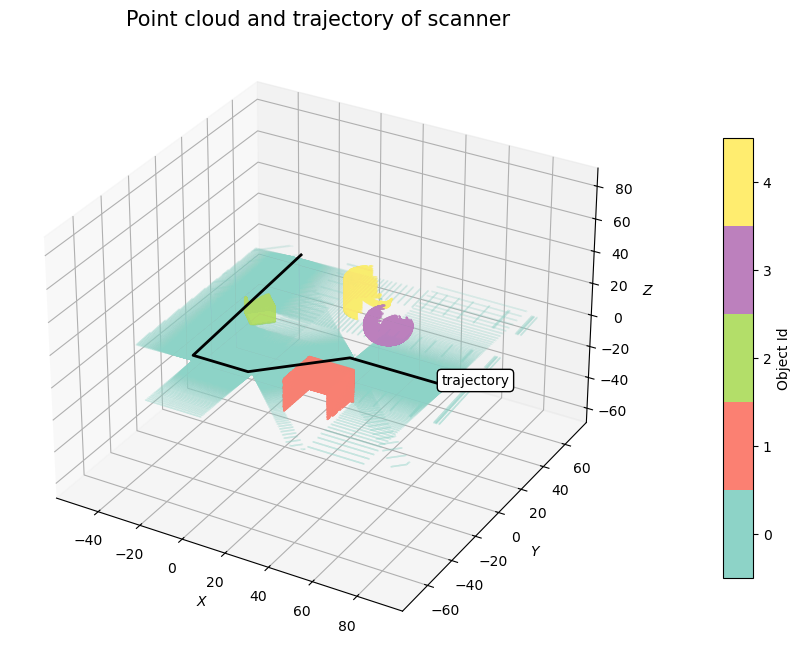

In [10]:
# Matplotlib figure.
fig = plt.figure(figsize=(12,8))
# Axes3d axis onto mpl figure.
ax = fig.add_subplot(projection='3d', computed_zorder=False)

#settings for a discrete colorbar
N = 5
cmap = plt.get_cmap('Set3', N)

# Scatter plot of points (coloured by HitObjectId)
sc = ax.scatter(strips[:, 0], strips[:, 1], strips[:, 2], c=strips[:, 8], cmap=cmap, s=0.02, zorder=1)

# Plot of trajectory.
ax.plot(traj[:, 0], traj[:, 1], traj[:, 2], c='black', linewidth=2, zorder=2)

cax = plt.axes([0.85, 0.2, 0.025, 0.55])
cbar = plt.colorbar(sc, cax=cax, ticks=[2/5, 6/5, 2, 2+4/5,4-2/5])
cbar.ax.set_yticklabels(['0', '1', '2', '3', '4'])
cbar.set_label('Object Id')

# Add axis labels.
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_zlabel('$Z$')

set_axes_equal(ax)    

# Set title.
ax.set_title(label='Point cloud and trajectory of scanner', fontsize=15)
ax.text(traj[-1,0], traj[-1,1], traj[-1,2], 'trajectory',
        bbox = dict(boxstyle='round', fc='w', ec='k'), size = '10')

# Display results
plt.show()

### Color by GPS Time

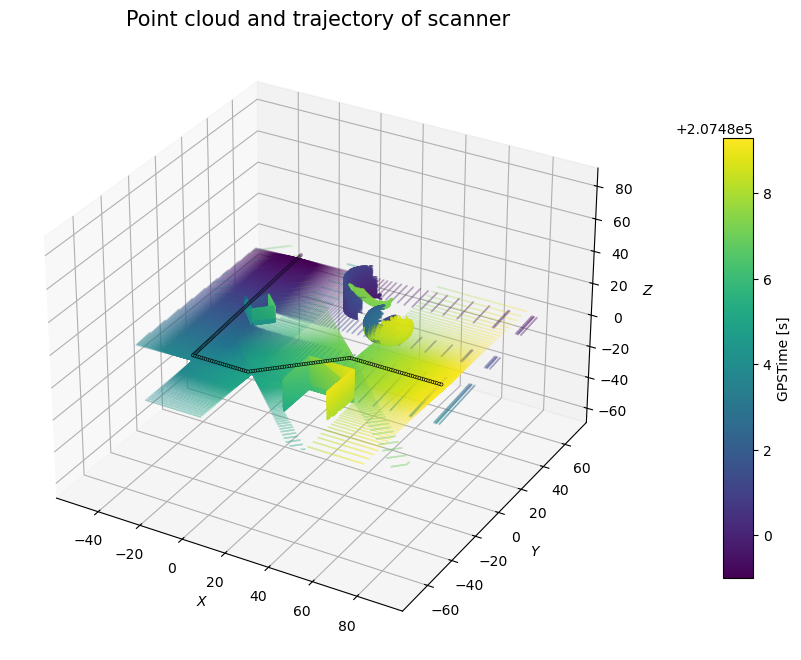

In [11]:
# Matplotlib figure.
fig = plt.figure(figsize=(12,8))
# Axes3d axis onto mpl figure.
ax = fig.add_subplot(projection='3d', computed_zorder=False)

#settings for a discrete colorbar
#cmap = plt.get_cmap('Set3')

# Scatter plot of points (coloured by HitObjectId)
sc_pc = ax.scatter(strips[:, 0], strips[:, 1], strips[:, 2], c=strips[:, 10], s=0.02, zorder=1)

# Plot of trajectory.
sc_traj = ax.scatter(traj[:, 0], traj[:, 1], traj[:, 2], c=traj[:, 3], s=5, zorder=2, lw=0.5)
sc_traj.set_edgecolor('black')

cax = plt.axes([0.85, 0.2, 0.025, 0.55])
cbar = plt.colorbar(sc_pc, cax=cax)
cbar.set_label('GPSTime [s]')

# Add axis labels.
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_zlabel('$Z$')

set_axes_equal(ax)    

# Set title.
ax.set_title(label='Point cloud and trajectory of scanner', fontsize=15)

# Display results
plt.show()

### Color by strip ID

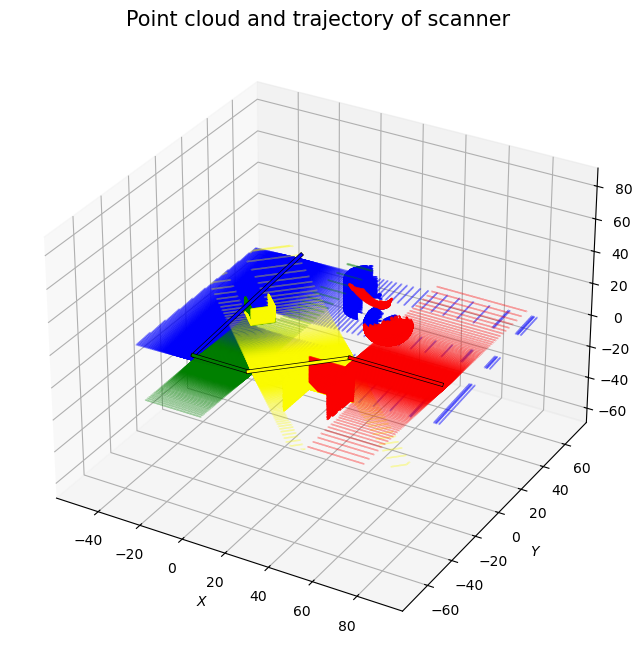

In [12]:
import matplotlib.patheffects as pe
# Matplotlib figure.
fig = plt.figure(figsize=(12,8))
# Axes3d axis onto mpl figure.
ax = fig.add_subplot(projection='3d', computed_zorder=False)

#settings for a discrete colorbar
N = 5
cmap = plt.get_cmap('Set3', N)

# Scatter plot of points (coloured by strip)
sc = ax.scatter(strip_1[:, 0], strip_1[:, 1], strip_1[:, 2], alpha=0.7, c='blue', s=0.02, zorder=1)
sc = ax.scatter(strip_2[:, 0], strip_2[:, 1], strip_2[:, 2], alpha=0.7, c='green', s=0.02, zorder=1)
sc = ax.scatter(strip_3[:, 0], strip_3[:, 1], strip_3[:, 2], alpha=0.7, c='yellow', s=0.02, zorder=1)
sc = ax.scatter(strip_4[:, 0], strip_4[:, 1], strip_4[:, 2], alpha=0.7, c='red', s=0.02, zorder=1)

# Plot of trajectory (coloured by strip; with black outline)
ax.plot(traj_1[:, 0], traj_1[:, 1], traj_1[:, 2], c='blue', linewidth=2, zorder=2, path_effects=[pe.Stroke(linewidth=3, foreground='black'), pe.Normal()])
ax.plot(traj_2[:, 0], traj_2[:, 1], traj_2[:, 2], c='green', linewidth=2, zorder=2, path_effects=[pe.Stroke(linewidth=3, foreground='black'), pe.Normal()])
ax.plot(traj_3[:, 0], traj_3[:, 1], traj_3[:, 2], c='yellow', linewidth=2, zorder=2, path_effects=[pe.Stroke(linewidth=3, foreground='black'), pe.Normal()])
ax.plot(traj_4[:, 0], traj_4[:, 1], traj_4[:, 2], c='red', linewidth=2, zorder=2, path_effects=[pe.Stroke(linewidth=3, foreground='black'), pe.Normal()])

# Add axis labels.
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_zlabel('$Z$')

set_axes_equal(ax)    

# Set title.
ax.set_title(label='Point cloud and trajectory of scanner', fontsize=15)

# Display results
plt.show()